# 4. Grouping and Making Comparisons


## 1. Research Scenario: Content Type and Popularity

Are posts with pictures more popular than other types of content? To answer this question we have to compare the content type in relation to the likes they receive. The code below shows how to do this. 

#### Exercise

Load posts by the comedian [Andy Borowitz](https://www.facebook.com/andyborowitz/). Data is [here](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/page_38423635680_2019_01_13_12_33_40.tab)

In [16]:
%matplotlib inline
import pandas as pd
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/page_38423635680_2019_01_13_12_33_40.tab'
data = pd.read_csv(url,sep='\t')


#### Exercise

Print the column names and the first ten rows. Which column contains information about the post's content type?

In [17]:
# insert code here
print (data.columns,data.head(10))
# type

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'rea_LOVE', 'rea_HAHA', 'rea_WOW', 'rea_SAD',
       'rea_ANGRY', 'rea_THANKFUL'],
      dtype='object')      type                     by                        post_id  \
0    link  post_page_38423635680  38423635680_10157498088090681   
1    link  post_page_38423635680  38423635680_10157497599080681   
2    link  post_page_38423635680  38423635680_10157497518435681   
3    link  post_page_38423635680  38423635680_10157495456045681   
4  status  post_page_38423635680  38423635680_10157495442305681   
5    link  post_page_38423635680  38423635680_10157495431550681   
6    link  post_page_38423635680  38423635680_10157495354310681   
7    link  post_page_38423635680  38423635680_10157495346240

Apply the `.unique()` method to this column to see which values the column contains.

In [18]:
# insert code here
# data.loc[:3,'type'].unique()
data['type'].unique() 

array(['link', 'status', 'photo', 'video'], dtype=object)

Of course, the "type" column lists indicates if the post contained a picture or not. With Pandas we can easily study whether, on average, posts with pictures receive more reactions than other content types. Run the code, later on, I will explain how it works.

In [19]:
group_means = data.groupby('type')['reactions_count_fb'].mean()
group_means 

type
link      11233.671579
photo     12232.368821
status    12054.924370
video      8582.608696
Name: reactions_count_fb, dtype: float64

A visual represention is often more insightful, so let's make a barplot to compare the means.

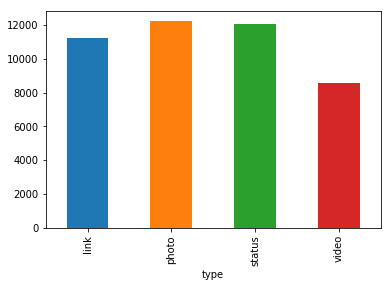

In [20]:
%matplotlib inline
group_means.plot(kind='bar')

Plotting the actual distribution is also possible.

type
link      AxesSubplot(0.125,0.125;0.775x0.755)
photo     AxesSubplot(0.125,0.125;0.775x0.755)
status    AxesSubplot(0.125,0.125;0.775x0.755)
video     AxesSubplot(0.125,0.125;0.775x0.755)
Name: reactions_count_fb, dtype: object

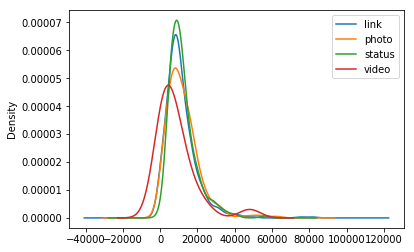

In [21]:
data.groupby('type')['reactions_count_fb'].plot(kind='density',legend=True)

#### About `.groupby()`

Ok, what happened here?

Basically, the `.groupby()` function groups the table by the column selected within the parentheses (here different content types, e.g. "link", "photo" etc.). Then for each group, we apply a specific calculation (e.g. computing the average or simply summing all the values). The figure below gives a good graphic representation of this process. The only difference is that we used the `.mean()` instead of `.sum()`.
<img src="http://i0.wp.com/datapandas.com/wp-content/uploads/2016/09/pandas-powerful-data-analysis-tools-group-by.jpg?resize=600%2C450">

Basically, `.groupby()` divides the DataFrame by a specific category and then applies a method (such as sum, median or other) to each of these sub-tables before combining the tables again. To see how this works you can inspect the toy example below.

In [22]:
example = pd.DataFrame([['A',1],['B',2],['A',4],['B',1],['A',6],['B',1]],columns=['category','value'])
example

,category,value
0,A,1
1,B,2
2,A,4
3,B,1
4,A,6
5,B,1


In the code cell below we group results by the "category" and then sums (for each of the sub-tables) the values in the "value" column

In [23]:
example.groupby('category')['value'].sum()

category
A    11
B     4
Name: value, dtype: int64

#### Exercise

Group by the "category" column and then compute the mean of 'value'.

In [24]:
# insert code here
example.groupby('category')['value'].mean()

category
A    3.666667
B    1.333333
Name: value, dtype: float64

#### Exercise

Returning to the Borowitz example: The results suggested that, on average, posts with pictures are more popular. But, as seen in lecture 2, the mean is sensitive to outliers. To check if the results are robust, investigate if the findings change when computing the median by content type.

In [25]:
# insert code here
data.groupby('type')['reactions_count_fb'].median()

type
link       9387.0
photo     10589.0
status    10215.5
video      5096.0
Name: reactions_count_fb, dtype: float64

#### Exercise

Does visual content elicit stronger *emotional* responses? Inspect the angry and love reactions.

In [26]:
# insert code here
print (data.groupby('type')['rea_ANGRY'].sum(),data.groupby('type')['rea_LOVE'].sum())

type
link      134264
photo      55986
status     43932
video      15649
Name: rea_ANGRY, dtype: int64 type
link      239713
photo     147304
status    120253
video      13539
Name: rea_LOVE, dtype: int64


#### \*\*\* Exercise

We can use a similar technique to track the most active users on  Social Media platforms. 
- Load comments on the YouTube Techno Documentary we studied in the second lecture (you can use [this table](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/videoinfo_-OLEyOYC6P4_2018_12_18-09_26_24_comments.tab))
- Group the table by users (use "authorName")
- Then apply `count()` to the "id" column
- Assign the result of this operation to a new variable `df_comment_count`
- Sort this DataFrame in descending order by applying the `.sort_values()` method to `df_comment_count` 
- In the latter method, set the `ascending` argument to `False` (i.e. .`sort_values(ascending=False)`)


In [27]:
# insert code here
import pandas as pd
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/videoinfo_-OLEyOYC6P4_2018_12_18-09_26_24_comments.tab'
df = pd.read_csv(url, sep='\t')
df_comment_count = df.groupby('authorName')['id'].count()
df_comment_count.sort_values()
df_comment_count.sort_values(ascending=False)

df.columns









Index(['id', 'replyCount', 'likeCount', 'publishedAt', 'authorName', 'text',
       'authorChannelId', 'authorChannelUrl', 'isReply', 'isReplyTo',
       'isReplyToName'],
      dtype='object')

#### \*\*\* Exercise

- Continuing the Youtube Techno example: Can you also rank the authors by the likes they have **received** (i.e. find the most popular authors). Save the result of the `.groupby()` operation in a new variable with the name `df_like_count`

> HINT: first group by authorName and then apply `sum()` to the likeCount

- Plot the distribution of these likes (grouped by author) with a Histogram or a Density plot. These follow a winner-takes-it-all [Power Law](https://en.wikipedia.org/wiki/Power_law)

> HINT: simply apply `.plot(kind='density'`) to `df_like_count`


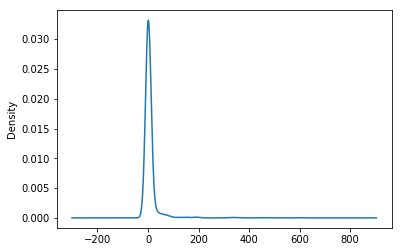

In [28]:
# insert code here
df_like_count = df.groupby('authorName')['likeCount'].sum()
df_like_count.plot(kind='density') 

## 2. Research Scenario: Lexicon-Based Sentiment Analysis with VADER

In the preceding examples we relied on reactions to study emotional behaviour on social media. Oftentimes, this information is not available, and we only have access the text itself to detect emotion. In this situation we can use automatic sentiment detection tools such as **VADER**.

[from Github](https://github.com/cjhutto/vaderSentiment): VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool.

VADER uses a [lexicon](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) (a mapping of words to sentiment values, e.g bad=-1.0, good=+1.0) to compute the sentiment (positivity or negativity) of a text.

#### Question

Inspect the VADER lexicon: Can you understand the structure of this table? 

Before working with VADER we first have to check if NLTK is properly installed.

In [31]:
# if this cell yields an error run the next one
import nltk

In [32]:
# only run this cell if the preceding one yields an error
!pip install nltk

Before we run VADER, we need to install the tool.

In [33]:
# we need to install the vader lexicon first
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ivanfeng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Now we can load and initialize the VADER Sentiment analyzer

In [36]:
from nltk.sentiment import vader
analyzer = vader.SentimentIntensityAnalyzer()

Below you can test VADER yourself by changing the value of the ``text`` variable, and running the code block. 

Can you trick the system? Not very easy isn't it?!

In [2]:
text = "Not interesting."
sentiments_analysis = analyzer.polarity_scores(text)
print(sentiments_analysis)

{'neg': 0.693, 'neu': 0.307, 'pos': 0.0, 'compound': -0.3089}


#### Exercise

Copy-paste the code above, but change the `text` variable and inspect the emotion scores VADER produces (try typing a very positive and a very negative sentence). Also, try to fool VADER by writing complex sentences with negations (such as "not sad").

In [3]:
# insert code here
text = "he is so smart, which makes him stupid sometimes."
sentiments_analysis = analyzer.polarity_scores(text)
print(sentiments_analysis)

{'neg': 0.245, 'neu': 0.504, 'pos': 0.251, 'compound': 0.0236}


We are interested here in the compound emotion, a combination of positive and negative sentiment. We can select this specific value by putting the string 'compound' between square brackets:

In [4]:
sentiments_analysis['compound']

0.0236

We can things a make easier, by writing a function that does this at once, i.e. return the compound score given a text. Just run the cell below, don't worry about the syntax.

In [5]:
# run this cell to create the function
def compound_sentiment(text):
    sentiments_analysis = analyzer.polarity_scores(str(text))
    return sentiments_analysis['compound']

In [6]:
example_text = "This is sooooo not funny!"
compound_sentiment(example_text)

-0.4015

`compound_sentiment` takes a text and returns the compound sentiment computed by VADER. This technique allows us to study emotional behaviour online, based on the posts users write.  

Once we have all the data in a DataFrame we can easily apply the `compound_sentiment` function to **all** comments. For such an operation--applying a function to all rows in a DataFrame--Pandas offers the `.apply()` method. In the cells below, we will investigate emotion in comments on the New York Times' Facebook page.

So let's load the data again. By now, you should know how this works.

In [7]:
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data_nytimes/page_5281959998_2018_12_28_22_00_39_comments.tab'
# insert code here
import pandas as pd
df = pd.read_csv(url, sep='\t')
def compound_sentiment(df):
    sentiments_analysis = analyzer.polarity_scores(str(df))
    return sentiments_analysis['compound']
df.apply(compound_sentiment)

position              0.0000
post_id               0.0000
post_by               0.0000
post_text             0.9993
post_published        0.0000
comment_id            0.0000
comment_by            0.0000
is_reply              0.0000
comment_message       0.7279
comment_published     0.0000
comment_like_count    0.0000
attachment_type       0.2960
attachment_url        0.0000
dtype: float64

Let's first try to compute sentiment present in the **posts** (instead of the comments). Look attentively at the syntax below. 

- `df['post_text']`: selects the column we want to use for sentiment mining
- .apply(compound_sentiment): apply the function between the paranthesis to this column

In [8]:
df['post_emotion'] = df['post_text'].apply(compound_sentiment)
df.head()

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,attachment_type,attachment_url,post_emotion
0,0_0,5281959998_10151785869499999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Facebook keeps its rulebooks and their existen...,2018-12-28T20:55:00+0000,10151785869499999_10151786007069999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"""Suzie34542244511, Ohio soccer mom with 130,00...",2018-12-28T21:00:22+0000,0,NaN,NaN,-0.2144
1,0_1,5281959998_10151785869499999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Facebook keeps its rulebooks and their existen...,2018-12-28T20:55:00+0000,10151785869499999_10151786005479999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,#ReleaseThePeePeeTapes God bless America.,2018-12-28T20:55:28+0000,1,NaN,NaN,-0.2144
2,1_0,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151785995194999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,stille die besten..,2018-12-28T20:28:07+0000,0,NaN,NaN,0.9274
3,1_1,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151786003144999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Jerry Lewis was a great comedian but often got...,2018-12-28T20:49:10+0000,1,NaN,NaN,0.9274
4,1_2,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151785999574999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"I thought cinema's greatest White Whale was ""H...",2018-12-28T20:39:21+0000,0,NaN,NaN,0.9274


#### \*\*\*Exercise

Plot a histogram that visualises the distribution of the emotion scores returned by VADER.

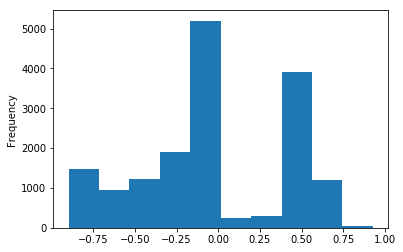

In [9]:
# insert code here
%matplotlib inline
df['post_emotion'].plot(kind='hist')

What is the average emotion score?

In [10]:
# insert code here
df['post_emotion'].mean()


-0.009281088145900966

Now apply `compound_sentiment` to the **comments** (above we applied it only to the posts). Save these scores in a new column `comment_emotion`.

In [11]:
# insert code here
df['comment_emotion'] = df['comment_message'].apply(compound_sentiment)
df.head()

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,attachment_type,attachment_url,post_emotion,comment_emotion
0,0_0,5281959998_10151785869499999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Facebook keeps its rulebooks and their existen...,2018-12-28T20:55:00+0000,10151785869499999_10151786007069999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"""Suzie34542244511, Ohio soccer mom with 130,00...",2018-12-28T21:00:22+0000,0,NaN,NaN,-0.2144,0.2960
1,0_1,5281959998_10151785869499999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Facebook keeps its rulebooks and their existen...,2018-12-28T20:55:00+0000,10151785869499999_10151786005479999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,#ReleaseThePeePeeTapes God bless America.,2018-12-28T20:55:28+0000,1,NaN,NaN,-0.2144,0.5994
2,1_0,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151785995194999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,stille die besten..,2018-12-28T20:28:07+0000,0,NaN,NaN,0.9274,-0.5994
3,1_1,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151786003144999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Jerry Lewis was a great comedian but often got...,2018-12-28T20:49:10+0000,1,NaN,NaN,0.9274,-0.3036
4,1_2,5281959998_10151785978419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,In 1972 Jerry Lewis best known for mainstrea...,2018-12-28T20:25:00+0000,10151785978419999_10151785999574999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"I thought cinema's greatest White Whale was ""H...",2018-12-28T20:39:21+0000,0,NaN,NaN,0.9274,0.6369


Plot the distribution of these emotion scores.

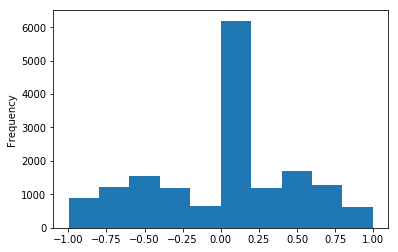

In [13]:
# insert code here
df['comment_emotion'].plot(kind='hist')


Is the average post more negative than the average comment?

In [17]:
# insert code here
if df['post_emotion'].mean() >= df['comment_emotion'].mean():
    print ('It is true')
   

It is true


## 3. Research Scenario: Finding the Haters (and Lovers?)

In this scenario, we aim to investigate online harrasment by identifying users who comment frequently *and* in a negative way. I selected comments from on an interview with [Taylor Swift](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/videoinfo_P-TFhUq3otQ_2019_01_15-11_21_20_comments.tab). Run the example, and replicate the scenario using a video of your own choice.

We start with loading the data.

In [27]:
import pandas as pd
import nltk
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/videoinfo_P-TFhUq3otQ_2019_01_15-11_21_20_comments.tab'
dfcomment=pd.read_csv(url,sep='\t')


The cell below contains a function to identify only the **negative** sentiment present in a post. After running the cell (and loading it into memory) we can apply it to all the comments.

In [28]:
def negative_sentiment(text):
    sentiments_analysis = analyzer.polarity_scores(str(text))
    return sentiments_analysis['neg']

#### Exercise

Change the text variable below, to undestand how `negative_sentiment` works.

In [35]:
text = 'you are stupid goofy'
negative_sentiment(text)

0.531

In [37]:
dfcomment['negative_emotion'] = dfcomment['text'].apply(negative_sentiment)

If you print the first 10 rows, you'll see that the DataFrame now contains a new colomn that records the negative emotion present in a comment.

In [22]:
dfcomment.head()

,id,replyCount,likeCount,publishedAt,authorName,text,authorChannelId,authorChannelUrl,isReply,isReplyTo,isReplyToName,negative_emotion
0,UgyNhVnrNpzqHU5hdO54AaABAg,0.0,0,2019-01-12 15:03:29,Moniroth Chan,My goal in life is to meet Taylor,UCn9xqtkMS1w7jbElitb6UXA,http://www.youtube.com/channel/UCn9xqtkMS1w7jb...,0,NaN,NaN,0.000
1,Ugxrey6blj89EZdXDUF4AaABAg,0.0,0,2019-01-09 04:51:17,Ava,What a sweet girl😍😍😍😘😘😘😘,UC_LG7fhSZZMcbxYLN2D76Uw,http://www.youtube.com/channel/UC_LG7fhSZZMcbx...,0,NaN,NaN,0.000
2,UgxGA83le3S-7tOmDy54AaABAg,0.0,0,2019-01-08 15:39:13,Hamad Salman,Taylor Swift Likes Letrazole But I&#39;m The O...,UCyCUPXmE8dae597puXZXRuA,http://www.youtube.com/channel/UCyCUPXmE8dae59...,0,NaN,NaN,0.000
3,UgxBxyt70Cw7O1_SJ4h4AaABAg,0.0,0,2019-01-06 05:37:25,Michael Juerakhan,Reputation yours mine let reputation stay repu...,UCkHPnvQaY1cJnGovjp0V1jg,http://www.youtube.com/channel/UCkHPnvQaY1cJnG...,0,NaN,NaN,0.226
4,UgwHPCrdPZAr840IzZZ4AaABAg,0.0,0,2019-01-04 10:36:57,Aid Junior Silva,Her fans are called &#39;swifties&#39;.... Pro...,UC7-hFlSVyLyW9wQDTMRMZdw,http://www.youtube.com/channel/UC7-hFlSVyLyW9w...,0,NaN,NaN,0.000


Now, we can count how often a user posted under this video by counting the number of comment ids by user. 

In [23]:
users = dfcomment.groupby('authorName')['id'].count()
users

authorName
- makkachin              1
13 Music                 1
137rtekke                1
1910th                   1
1979RayDay               2
1GodOnlyOne              1
1ranjeeves21             1
256 bradley              1
333suncat                1
88motho                  1
90s kidflashbacks        1
AHMAD AbuHelal           1
ALBER PAJARES            1
ANJ                      1
Aadityakiran S.          2
Aakhya Sinha             1
Aaron Festive            2
Aashka Shah              4
Ab_strxt                 1
Ace                      1
Actual Communist Bun     1
Adam Greene              1
Adriene Michelle         1
Adventure Clay & Lori    2
Agenda Yahudi            3
Ahhh AH                  1
Aid Junior Silva         1
Airlie Maria Heung       1
Ak                       8
Al Whatley               1
                        ..
violetgirl1996           1
walt686868               1
wpaulvandyk              1
xflashinglightsx         3
xolove kpopkdrama        2
xxii             

As we are only interested in the very active users, we sort the Series in descending order.

In [24]:
users_sorted = users.sort_values(ascending=False)
users_sorted

authorName
Luciano Vasquez                     80
Ashley Maria                        48
rosana conta3                       34
NJ Ringlord                         26
ann landers                         23
LeKaiser                            18
heidos7                             14
n i c o l e                         14
donna easty                         13
namelessfire                        13
Upscale Avenue                      11
Rotary!                             10
ildottoreno46                       10
Chimkinnuggers2888                  10
BellinghamsterTrail                 10
Ak                                   8
frankie4you2013                      8
John Vu                              8
SleepyHead                           8
ModeratelyIndecisive                 8
jboy ox                              7
Alejandra Escutia Angulo             7
Kylie Sparks                         7
Sabhyata Singh                       7
Invidious                            7
RoomWithAView 

The `.index` attribute contains the actual name of the users, sorted by the number of comments they posted

In [25]:
users_sorted.index

Index(['Luciano Vasquez', 'Ashley Maria', 'rosana conta3', 'NJ Ringlord',
       'ann landers', 'LeKaiser', 'heidos7', 'n i c o l e', 'donna easty',
       'namelessfire',
       ...
       'Sarah Schneider', 'Sarah Connor', 'Sara Righetti', 'Sara LobCab',
       'Sara Bara', 'Sam Lesly', 'Salma Sea', 'Salazama',
       'Sakura Christine Ito', '- makkachin'],
      dtype='object', name='authorName', length=1232)

For this example, we only look at the 10 most active users. These we can select by applying the square brackets to the Series.

In [26]:
ten_most_active = users_sorted.index[:10]
ten_most_active 

Index(['Luciano Vasquez', 'Ashley Maria', 'rosana conta3', 'NJ Ringlord',
       'ann landers', 'LeKaiser', 'heidos7', 'n i c o l e', 'donna easty',
       'namelessfire'],
      dtype='object', name='authorName')

Once we have these names, we can select rows where the user name appears in the `ten_most_active` list. In Pandas, we can create a mask with `list1.isin(list2)`. The method `.isin()` checks whether elements from `list1` appear in `list2`. More precisely, which values in the column 'authorName' appear in the `ten_most_active` Series. The cell below prints the rows for which this condition holds.

In [27]:
dfcomment['authorName'].isin(ten_most_active)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2005    False
2006     True
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015     True
2016    False
2017    False
2018     True
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
2025    False
2026    False
2027    False
2028    False
2029    False
2030    False
2031    False
2032    False
2033    False
2034    False
Name: authorName, Length: 2035, dtype: bool

We save rows created by the these most active users in a separate DataFrame. You'll notice that we discard quite some information as most users only post once.

In [28]:
df_active_users = dfcomment[dfcomment['authorName'].isin(ten_most_active)]
df_active_users.shape

(283, 12)

Lastly, we rely on `.groupby()` to compute the mean of the negative emotion scores (by user).

In [29]:
negative_commenters = df_active_users.groupby('authorName')['negative_emotion'].mean()
negative_commenters

authorName
Ashley Maria       0.181792
LeKaiser           0.066722
Luciano Vasquez    0.115663
NJ Ringlord        0.107808
ann landers        0.144304
donna easty        0.079692
heidos7            0.058214
n i c o l e        0.190286
namelessfire       0.092462
rosana conta3      0.113235
Name: negative_emotion, dtype: float64

Oh, and don't forget to sort the users by their negativity.

In [30]:
negative_commenters.sort_values(ascending=False)

authorName
n i c o l e        0.190286
Ashley Maria       0.181792
ann landers        0.144304
Luciano Vasquez    0.115663
rosana conta3      0.113235
NJ Ringlord        0.107808
namelessfire       0.092462
donna easty        0.079692
LeKaiser           0.066722
heidos7            0.058214
Name: negative_emotion, dtype: float64

With `.loc` we can inspect what these users actually wrote:

In [39]:
pd.options.display.max_colwidth = -1 # ignore this, this is just to print more text
print(dfcomment.loc[dfcomment['authorName'] == 'n i c o l e','text'])
pd.options.display.max_colwidth = 50 # ignore this, this is just to print more text

376    Oh I spotted a hater and an kanye west fan. Why did you do this? I mean, I don't like Kanye West and the Kardashians but I won't say that they are being fake. If Taylor acts good in front of camera, it doesn't mean that she's just being fake. Same to Kimye, if they act rude and such in front of camera, they are still the same irl.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
418    Lies*                                                          

#### \*\*\*Exercise

Replicate this scenario with a YouTube video of your own choice.

In [50]:
# insert code here
import pandas as pd
df1 = pd.read_csv('./dataams/videoinfo_LiZY0g5RYlY_2019_01_16-12_51_22_comments.tab', sep ='\t')

def negative_sentiment(df1):
    sentiments_analysis = analyzer.polarity_scores(str(df1))
    return sentiments_analysis['neg']

df1['negative_emotion'] = df1['text'].apply(negative_sentiment)
df1['negative_emotion'].head()
df1.groupby('authorName')['id'].count()
users_sorted = users.sort_values(ascending=False)
users_sorted.index
ten_most_active = users_sorted.index[:10]
df1['authorName'].isin(ten_most_active)
df_active_users = df1[df1['authorName'].isin(ten_most_active)]
df_active_users.shape
negative_commenters = df_active_users.groupby('authorName')['negative_emotion'].mean()
negative_commenters.sort_values(ascending=False)

authorName
Rapha                   0.204333
Leon Noordzij           0.156429
Daan Made in Holland    0.143667
RedroomStudios          0.099027
Timmy Turner            0.084600
Meatym8                 0.042571
Kim Birdwonders         0.036000
Amenda                  0.006750
UNILAD Adventure        0.000000
Kees Manuel             0.000000
Name: negative_emotion, dtype: float64

## 4. Research Scenario: Content Analysis and Reactions

In this scenario, we study text in relation to context. Do certain topics elicit more negative reactions than others? Here we look at the perception of Trump on Fox News and the New York Times.

But first, we have to revisit the string methods encountered in Lecture 1. There we inspected several string functions, for example `len()` and `.lower()`. 

#### Exercise

Count the number of characters in the sentence below.

In [52]:
sentence = "Jeremy Corbyn has pledged Labour will call a no-confidence motion in Theresa May’s government “soon”, while again indicating that if he became prime minister he would prefer to negotiate his own Brexit deal rather than call a second referendum."
# insert code here
len(sentence)

244

Now, lowercase the sentence and save the lowercased sentence in a new variable `sentence_lower`.

In [61]:
# insert code here
sentence_lower = sentence.lower()


With Pandas, you can easily apply these functions to a whole text column. Look attentively to the toy example below, before turning towards the main assignment.

In [62]:
example_df = pd.DataFrame([[17,'Hello :-)'],[25,'How are you!'],[121,'Yes!'],[10,"Yihaaaa"]],columns=['likes','text'])
example_df

,likes,text
0,17,Hello :-)
1,25,How are you!
2,121,Yes!
3,10,Yihaaaa


`len` records the length of each text.

> Notice the use of .str. between the column and the `len()` function.

In [63]:
example_df['text'].str.len()

0     9
1    12
2     4
3     7
Name: text, dtype: int64

We can add this column to the DataFrame.

In [64]:
example_df['text_length'] = example_df['text'].str.len()
example_df

,likes,text,text_length
0,17,Hello :-),9
1,25,How are you!,12
2,121,Yes!,4
3,10,Yihaaaa,7


Now we have a new column that records the length of the values in the text column.

#### \*\*\*Exercise 

- Retrieve comments from the New York Times (or use [these data](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data_nytimes/page_5281959998_2018_12_28_22_00_39_comments.tab) I prepared)
- Compute the length of each comment; add these values as a new column to the DataFrame
- Sort the DataFrame by comment length; print the ten longest comments
- Plot the distribution of the comment lengths using a Histogram (set the `bins` attribute to 100)

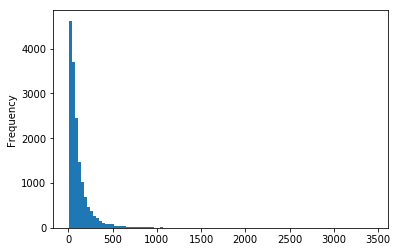

In [82]:
# insert code here
import pandas as pd 
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data_nytimes/page_5281959998_2018_12_28_22_00_39_comments.tab'
df = pd.read_csv(url, sep='\t')
df['text_length'] = df['comment_message'].str.len()
df.sort_values(by='text_length',ascending=False)[:10]
%matplotlib inline
df['text_length'].plot(kind='hist',bins =100)











#### \*\*\*Exercise 

Simple question: are posts on the New York Times Facebook page on average longer than those on the Fox News page?  Use the techniques you learned in this and previous lecture to answer this question. You can use these data:
- [Fox News](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab)
- [New York Times](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab)

In [96]:
# insert code here
FN = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab'
NYT = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab'

dfFN = pd.read_csv(FN, sep='\t')
dfNYT = pd.read_csv(NYT,sep='\t')

dfFN['post_length'] = dfFN['post_message'].str.len()
A = dfFN['post_length'].mean()

dfNYT['post_length'] = dfNYT['post_message'].str.len()
B = dfNYT['post_length'].mean()

if A>=B:
    print (B)







Besides len() and lower() we can also apply `.find()` to text columns in DataFrames. Revisiting the toy example above (`example_df`), let's make a new column that has value one for strings that contain the character `a`, otherwise, the value is zero.

First we create a column that has value -1 for strings that do not contain the query term (in this case the character 'a'), otherwise, it records the position of the first hit.

In [83]:
 example_df['text'].str.find('a')

0   -1
1    4
2   -1
3    3
Name: text, dtype: int64

The code below adds this information as a new column to the `example_df` DataFrame:

In [85]:
example_df['has_a'] = example_df['text'].str.find('a')
example_df

,likes,text,text_length,has_a
0,17,Hello :-),9,-1
1,25,How are you!,12,4
2,121,Yes!,4,-1
3,10,Yihaaaa,7,3


## Changing the values of cells

Below we change the value for the 'has_a' column. If the value is bigger than -1 (which means that the row contains the query term) we set the value to 1.

> Notice the use of `.loc`. The syntax is similar to selecting a part of a DataFrame using a mask and a column name.

In [97]:
example_df.loc[example_df['has_a'] >= 0,'has_a'] = 1 
example_df

,likes,text,text_length,has_a
0,17,Hello :-),9,-1
1,25,How are you!,12,1
2,121,Yes!,4,-1
3,10,Yihaaaa,7,1


For those rows that do not contain the query term, we set the values to zero.

In [98]:
example_df.loc[example_df['has_a'] < 0] = 0
example_df

,likes,text,text_length,has_a
0,0,0,0,0
1,25,How are you!,12,1
2,0,0,0,0
3,10,Yihaaaa,7,1


We can use a similar technique to find posts about Trump from the New York Times. 

#### Exercise

Explain, in a few words, what happens at each line in the code cells below. Use # to comment on the code.

In [99]:
# load the data
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab'
data_nytimes = pd.read_csv(url,sep='\t')
data_nytimes.columns
# show the columns name /values

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'rea_LOVE', 'rea_HAHA', 'rea_WOW', 'rea_SAD',
       'rea_ANGRY', 'rea_THANKFUL'],
      dtype='object')

In [100]:
data_nytimes['about_trump'] = data_nytimes['post_message'].str.find('Trump')
data_nytimes['about_trump'] 
# find the word frequency of Trump in post messages, add a new column showing occurence, -1 means null 

0       -1
1       -1
2       39
3       -1
4       -1
5       -1
6       -1
7       -1
8       -1
9       -1
10      -1
11      -1
12      -1
13      -1
14      -1
15      -1
16      -1
17      -1
18      -1
19      -1
20      -1
21      -1
22      -1
23      -1
24       0
25      -1
26      -1
27      77
28      -1
29      -1
      ... 
969     -1
970     -1
971     -1
972     10
973     -1
974    103
975     -1
976     -1
977    101
978     -1
979     -1
980     -1
981     -1
982     -1
983     -1
984     -1
985     -1
986     -1
987     -1
988     -1
989     -1
990     -1
991     -1
992     -1
993     -1
994     -1
995     -1
996     -1
997     -1
998     -1
Name: about_trump, Length: 999, dtype: int64

In [101]:
data_nytimes.loc[data_nytimes['about_trump'] >= 0,'about_trump'] = 1
data_nytimes.loc[data_nytimes['about_trump'] < 0,'about_trump'] = 0
# second line: those rows that do not contain the query term 'Trump', we set the values to zero

Now "about_trump" is a binary variable: 1 for posts that mention Trump, 0 otherwise.

In [103]:
data_nytimes['about_trump']

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     1
28     0
29     0
      ..
969    0
970    0
971    0
972    1
973    0
974    1
975    0
976    0
977    1
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
Name: about_trump, Length: 999, dtype: int64

Now we can investigate if posts about Trump receive more angry reactions!

In [104]:
trump_angry = data_nytimes.groupby('about_trump')['rea_ANGRY'].mean()
trump_angry

about_trump
0     202.882494
1    1090.733333
Name: rea_ANGRY, dtype: float64

The numbers are convincing, even more so when we use a visualisation.

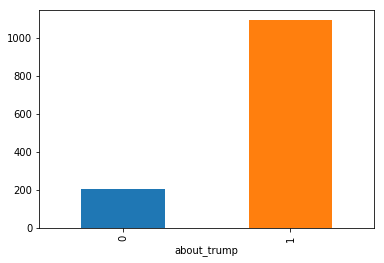

In [105]:
trump_angry.plot(kind='bar')

#### \*\*\*What about love for Trump on the New York Times?

What about LOVE for Trump?

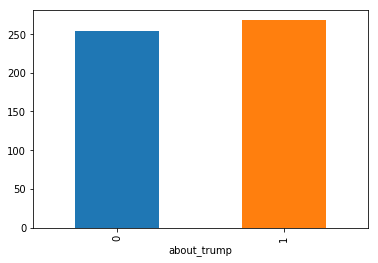

In [106]:
# insert code here
trump_love = data_nytimes.groupby('about_trump')['rea_LOVE'].mean()
trump_love.plot(kind='bar')

#### \*\*\* Exercise

Use the [Fox News Dataset](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab). Do you find a similar pattern when inspecting Love and Hate reactions to Trump?

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


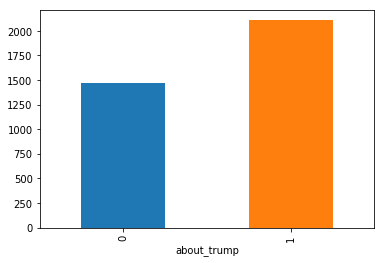

In [112]:
# insert code here
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab'
data_fox = pd.read_csv(url,sep='\t')
data_fox['about_trump'] = data_fox['post_message'].str.find('Trump')
data_fox.loc[data_fox['about_trump'] >= 0,'about_trump'] = 1
data_fox.loc[data_fox['about_trump'] < 0,'about_trump'] = 0

trump_angry = data_fox.groupby('about_trump')['rea_ANGRY'].mean()
trump_love = data_fox.groupby('about_trump')['rea_LOVE'].mean()

print (trump_angry.plot(kind='bar'),trump_love.plot(kind='bar'))



#### \*\*\* Exercise

Let's revisit the posts from Andy Borowitz. He become a famous critique of Donald Trump. The exercise explores whether his followers are more reactive to his comments on the president.

Similar to the example above:
- Create a new column with the name "lowercased" which contains the lowercased text
- Create a column which records if the post contains the string "trump". The column has value 1 if the post text mentions Trump, otherwise it has the value 0.
- Use `.groupby()` to compare the average number of **likes** that posts about Trump receive.
- Inspect also HAHA, LOVE and ANGRY reactions.

about_trump
0    7020.465662
1    6245.504975
Name: likes_count_fb, dtype: float64
about_trump
0    274.850921
1    213.296020
Name: rea_ANGRY, dtype: float64 about_trump
0    585.869347
1    425.485075
Name: rea_LOVE, dtype: float64 about_trump
0    3479.279732
1    4528.912935
Name: rea_HAHA, dtype: float64


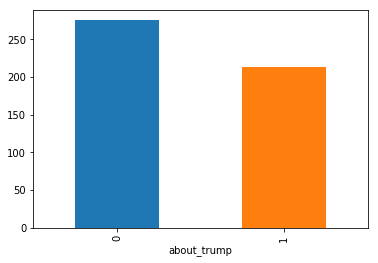

In [6]:
# insert code here
import pandas as pd
url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/page_38423635680_2019_01_13_12_33_40.tab'
data = pd.read_csv(url,sep='\t')
data['lowercased'] = data['post_message'].str.lower()
data['about_trump'] = data['lowercased'].str.find('trump')
data.loc[data['about_trump'] >= 0,'about_trump'] = 1
data.loc[data['about_trump'] < 0,'about_trump'] = 0

trump_likes = data.groupby('about_trump')['likes_count_fb'].mean()
print (trump_likes)

trump_angry = data.groupby('about_trump')['rea_ANGRY'].mean()
trump_love = data.groupby('about_trump')['rea_LOVE'].mean()
trump_haha = data.groupby('about_trump')['rea_HAHA'].mean()

print (trump_angry,trump_love,trump_haha)

trump_angry.plot(kind='bar')



# That's all for today! Congratulations again!